In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import os

# 1. Loading and browser data

In [11]:
# Importing the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
# Take a look at the overview of the datasets
train.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
2230,p,x,f,w,f,c,f,c,n,g,...,w,w,p,w,o,p,n,s,d,3165
450,e,f,y,y,t,l,f,c,b,n,...,w,w,p,w,o,p,k,s,p,644
1695,e,x,y,e,t,n,f,c,b,w,...,g,w,p,w,o,p,k,y,d,2408
1875,e,f,f,n,t,n,f,c,b,p,...,g,p,p,w,o,p,n,y,d,2662
138,e,x,y,y,t,l,f,c,b,w,...,w,w,p,w,o,p,n,s,g,200


In [13]:
test.sample(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Id
1954,f,y,n,f,f,f,c,n,b,t,...,w,p,p,w,o,e,w,v,l,6542
421,x,f,n,t,n,f,c,b,u,t,...,g,p,p,w,o,p,k,y,d,1435
1317,x,y,y,f,f,f,c,b,p,e,...,p,p,p,w,o,l,h,y,g,4455
961,x,s,g,f,c,f,c,n,u,e,...,w,w,p,w,o,p,n,v,d,3268
507,x,f,n,t,n,f,c,b,w,t,...,w,g,p,w,o,p,k,y,d,1700


# 2. EDA for missing values

In [14]:
print("The shape of the train data is (row, column):" + str(train.shape))
print(train.info())
print("The shape of the test data is (row, column):" + str(test.shape))
print(test.info())

The shape of the train data is (row, column):(5657, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil

In [15]:
# Save the id in advance in order to submit later
trainId = train.Id
testId = test.Id
# I will drop Id because for it will not be used for our data
# train.drop(['Id], axis=1, inplace=True)
# test.drop(['Id], axis=1, inplace=True)
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 24 columns):
class                       5657 non-null object
cap-shape                   5657 non-null object
cap-surface                 5657 non-null object
cap-color                   5657 non-null object
bruises                     5657 non-null object
odor                        5657 non-null object
gill-attachment             5657 non-null object
gill-spacing                5657 non-null object
gill-size                   5657 non-null object
gill-color                  5657 non-null object
stalk-shape                 5657 non-null object
stalk-root                  5657 non-null object
stalk-surface-above-ring    5657 non-null object
stalk-surface-below-ring    5657 non-null object
stalk-color-above-ring      5657 non-null object
stalk-color-below-ring      5657 non-null object
veil-type                   5657 non-null object
veil-color                  5657 non-null object
ring-number

# 3. Visualization and Feature Relations

## 3a. cap-shape and class

In [16]:
train['cap-shape'].value_counts()

x    2575
f    2205
k     553
b     299
s      23
c       2
Name: cap-shape, dtype: int64

In [17]:
train['class'].value_counts()

e    2956
p    2701
Name: class, dtype: int64

In [18]:
# Encode class
for i in range(len(train['class'])):
    if train['class'][i] == 'p':
        train['class'][i] = 1
    else:
        train['class'][i] = 0

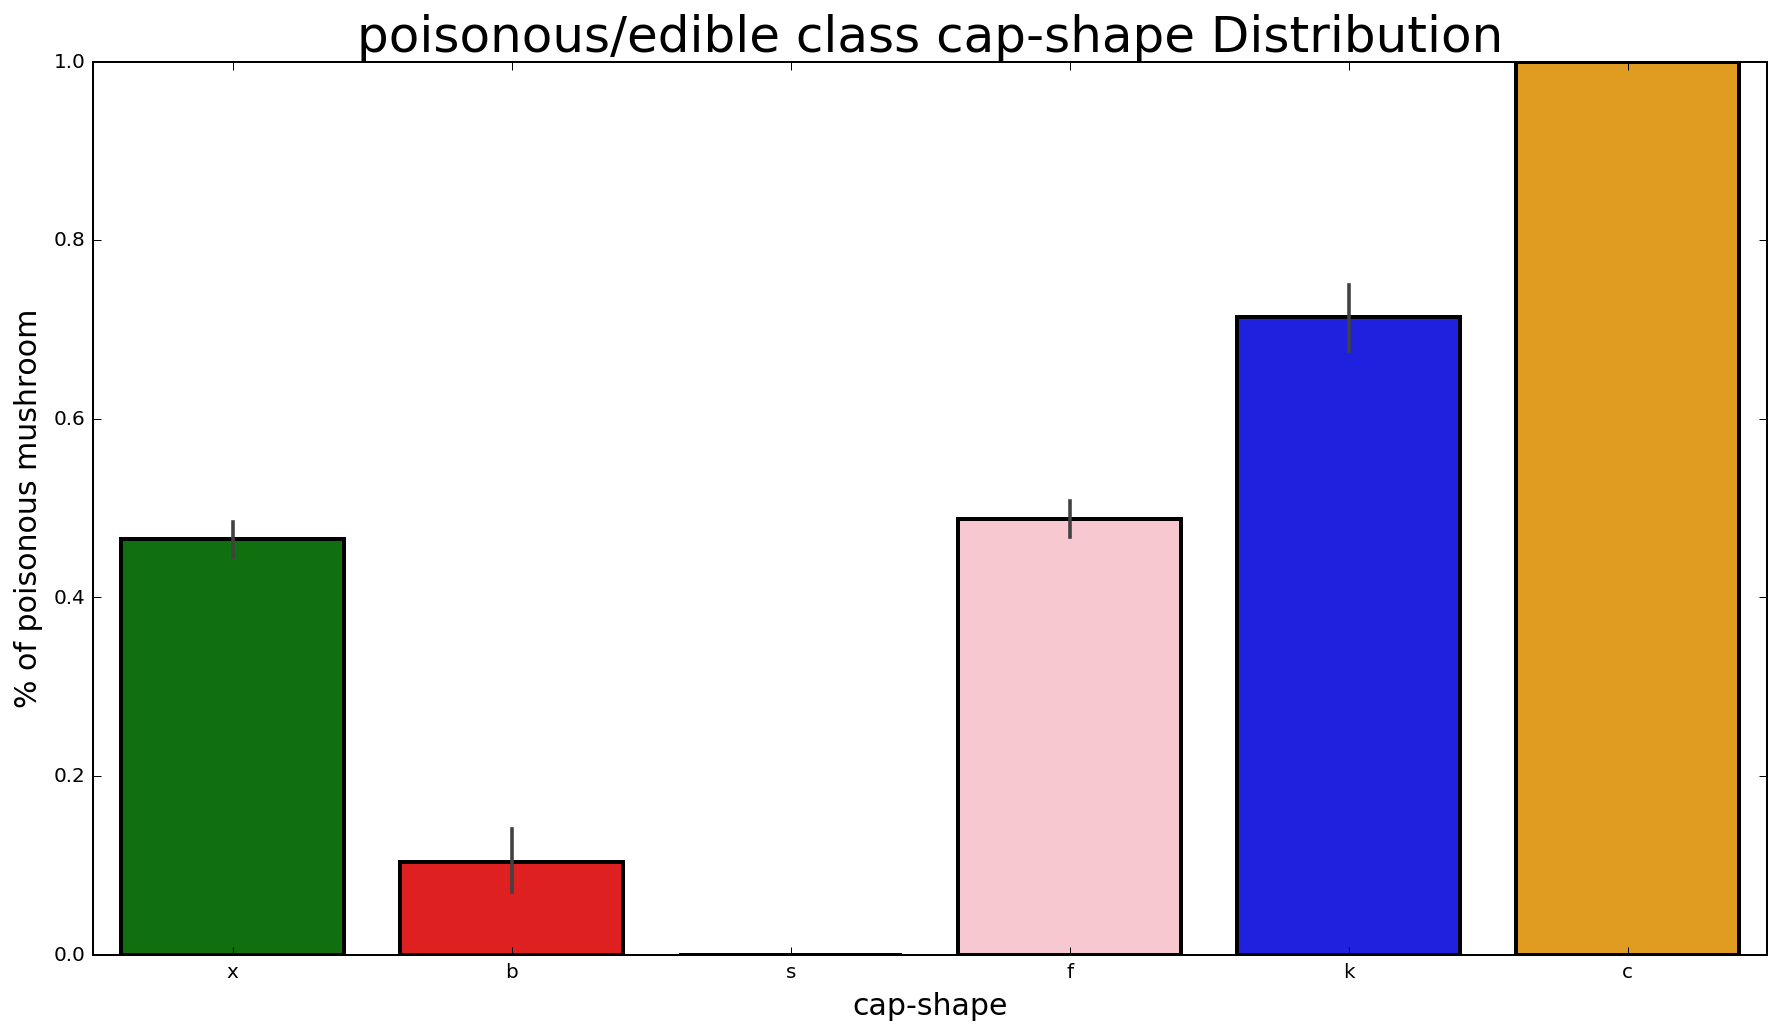

In [19]:
pal = {'x':"green", 'f':"Pink", 'k':"blue", 'b':"red", 's':"yellow", 'c':"orange"}
plt.subplots(figsize = (15, 8))
ax = sns.barplot(x = "cap-shape", y = "class", data=train, palette = pal, linewidth=2)
plt.title("poisonous/edible class cap-shape Distribution", fontsize = 25)
plt.ylabel("% of poisonous mushroom", fontsize = 15)
plt.xlabel("cap-shape", fontsize = 15);

The bar plot above shows the distribution of x, b, s, f, k and c poisonous mushroom, the x_label represents cap-shape feature while the y_label represents the % of poisonous mushroom. The bar chart shows about 45% of x are poisonous, 10% of b are poisonous, none of s are poisonous, 50% of f are poisonous, 75% of k are poisonous and all of c are poisonous.

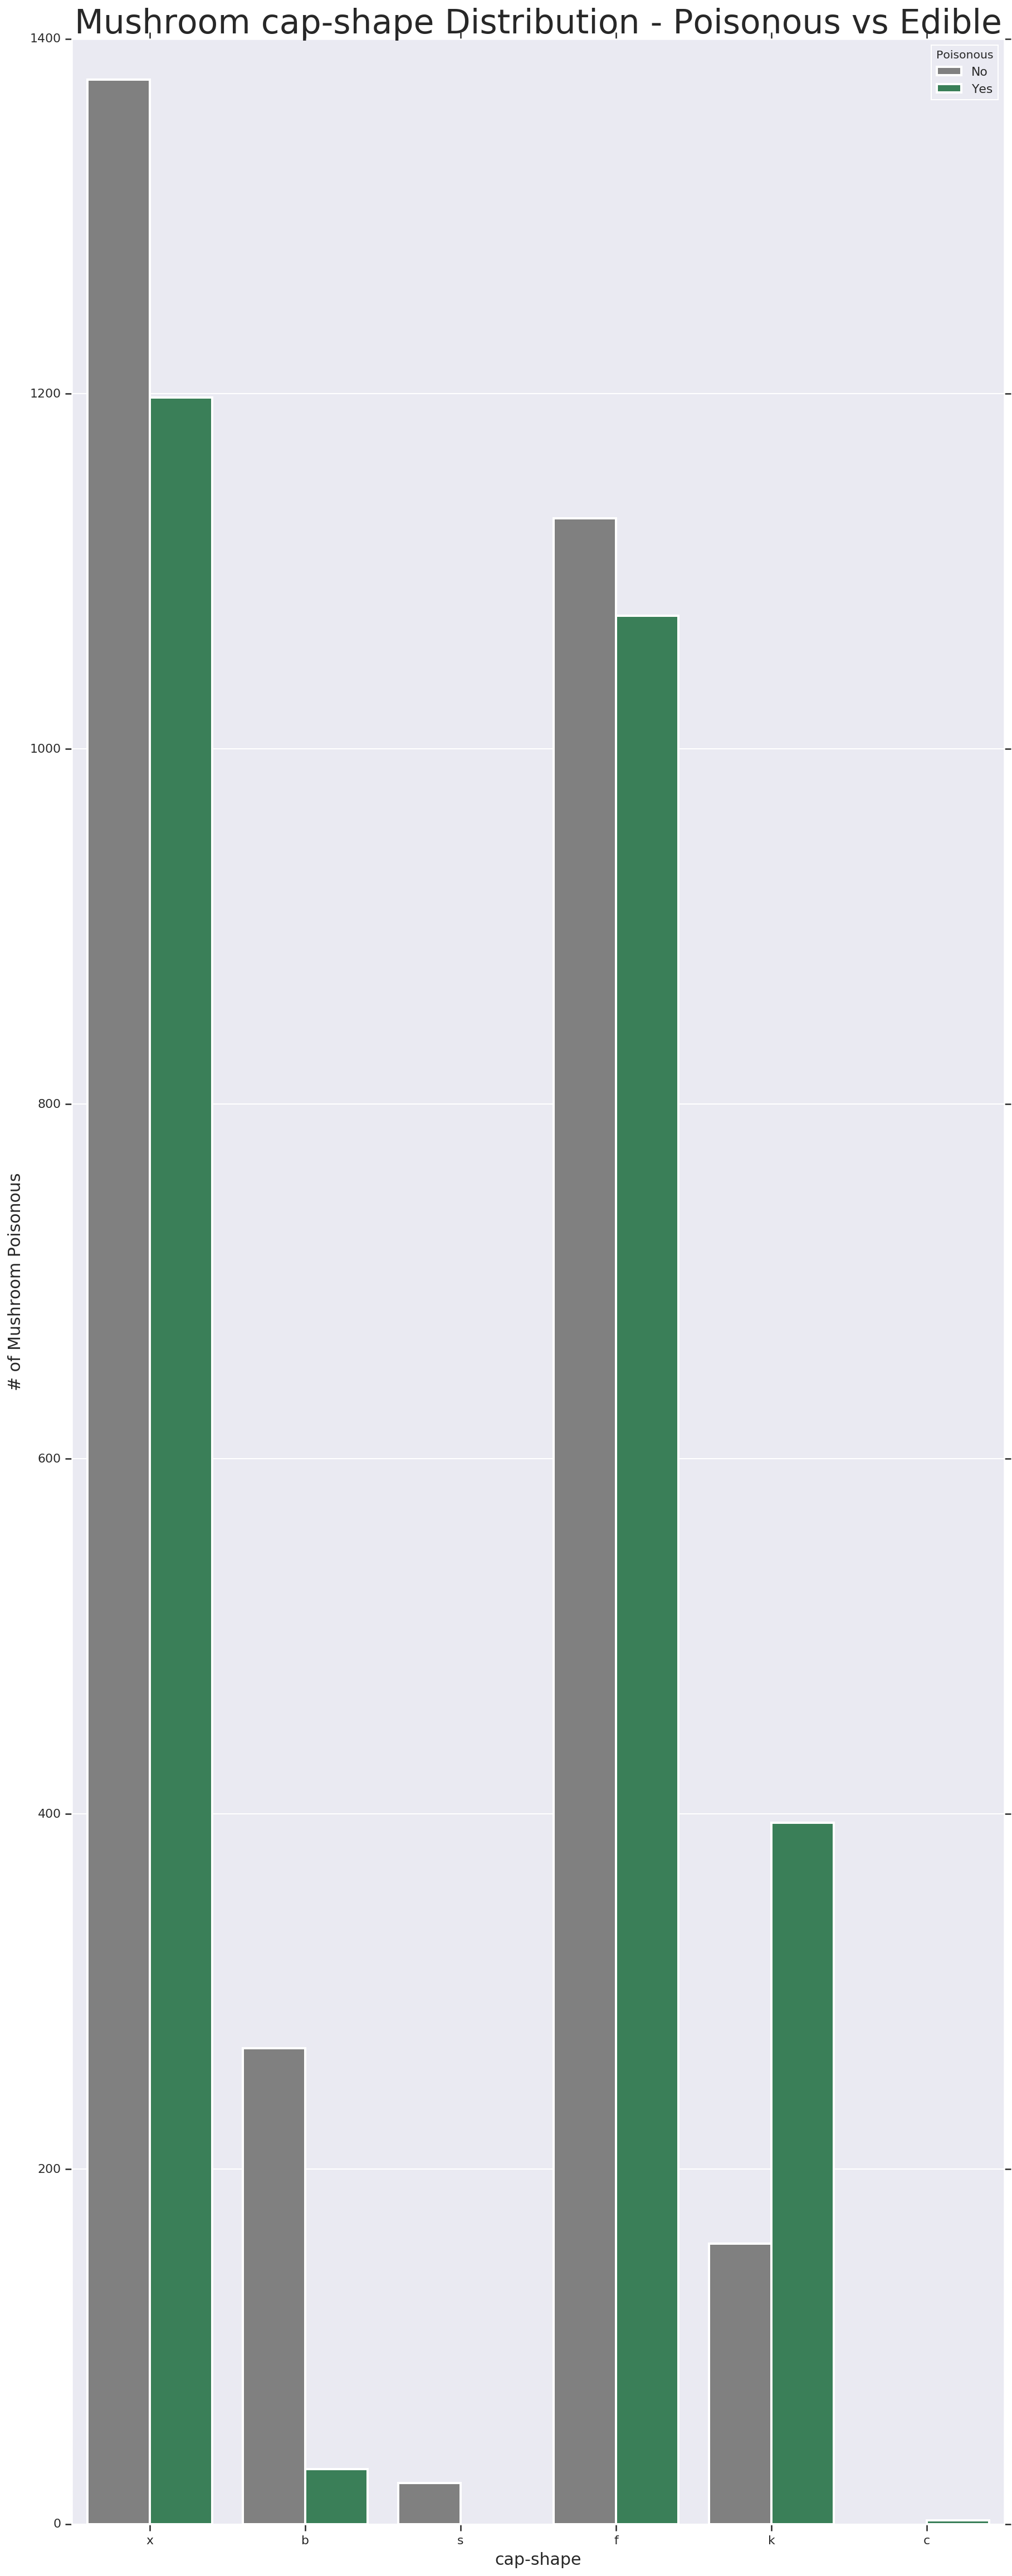

In [29]:
pal = {1:"seagreen", 0:"gray"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,40))
ax = sns.countplot(x = "cap-shape",
                  hue = "class",
                  data = train, 
                   linewidth = 2,
                  palette = pal
)

# Fixing title, xlabel and ylabel
plt.title("Mushroom cap-shape Distribution - Poisonous vs Edible", fontsize = 30)
plt.xlabel("cap-shape", fontsize = 15);
plt.ylabel("# of Mushroom Poisonous", fontsize = 15)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Poisonous")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()
